Hang Ngo
<br>
Professor S.L
<br>
Final Project
<br>
November 20th, 2023

Data source: Billionaires Statistics Dataset (2023)
<br>
https://www.kaggle.com/datasets/nelgiriyewithana/billionaires-statistics-dataset

## The Data: Billionaire Dataset

In [1]:
# Import all the necessary packages
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import f_oneway, ttest_ind

In [2]:
# Import statmodels for regression analysis
try:
    import statsmodels.api as sm
except ImportError:
    print("statsmodels is not installed. Installing...")
    !pip install statsmodels
    import statsmodels.api as sm

In [3]:
# Read the original dataset
billionaire = pd.read_csv("Billionaires Statistics Dataset.csv")
billionaire.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


### Data Cleaning and Exploration

In [4]:
# Only choose the following columns for this project
billionaire = billionaire[["age", "country", "industries", "gender", "finalWorth"]]

# Rename the column
billionaire = billionaire.rename(columns = {"age": "age", "country": "country",\
                                            "industries": "industry", "gender": "gender",\
                                            "finalWorth": "networth"})
# Recode 'gender' column
billionaire["gender"] = np.where(billionaire.gender == "M", "male", "female")

# Check the dataset
billionaire.head()

,age,country,industry,gender,networth
0,74.0,France,Fashion & Retail,male,211000
1,51.0,United States,Automotive,male,180000
2,59.0,United States,Technology,male,114000
3,78.0,United States,Technology,male,107000
4,92.0,United States,Finance & Investments,male,106000


In [5]:
# Let's check for NULLs 
billionaire.isnull().sum()

age         65
country     38
industry     0
gender       0
networth     0
dtype: int64

In [6]:
# Let's drop NULLs
billionaire = billionaire.dropna()
print(billionaire.isnull().sum()) # to make sure all NULLs are dropped

age         0
country     0
industry    0
gender      0
networth    0
dtype: int64


In [7]:
# Retype age and check the data once again
billionaire["age"] = billionaire.age.astype("int")
billionaire.head()

,age,country,industry,gender,networth
0,74,France,Fashion & Retail,male,211000
1,51,United States,Automotive,male,180000
2,59,United States,Technology,male,114000
3,78,United States,Technology,male,107000
4,92,United States,Finance & Investments,male,106000


### Data Dictionary

|Column |Data Type|Description  |Data Example | 
|-----|:-----|:---:|:-----:|
|age|Integer|Age of the billionaire|59|
|country|Str|Country the billionaire resides in|United States|
|industry|Str|The industry associated with the billionaire's business interests|Technology|
|gender|Str|Gender of the billionaire|male|
|networth|Float|How much the billionaire is worth in billion, in US Dollars|114000|

Now we are ready for the data menu today!!!

### Menu Choices include:
- Get to know dataset by seeing the top 5 rows and statistics for all quantitative columns.
- Top categories with the most number of billionaires.
- Correlation between quantitative columns.
- T-test: average networth between genders.
- ANOVA test: average networth between categories.
- Regression model.

## Project Demonstration: Menu Choice


Let's see the menu!

1. Get to know our data a little

2. See the top categories with most number of billionaires!

3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!

4. Is the average net worth the same between gender (male and female)?

5. Let's do some ANOVA test, for any categorical columns with more than 3 unique values!

6. Let's build a regression model and see if it's any good :>

7. Quit


What can I get you today? 1



Let's get to know our data a little!
See the first 5 rows of the dataset
   age        country               industry gender  networth
0   74         France       Fashion & Retail   male    211000
1   51  United States             Automotive   male    180000
2   59  United States             Technology   male    114000
3   78  United States             Technology   male    107000
4   92  United States  Finance & Investments   male    106000

Let's see some statistics!
               age       networth
count  2549.000000    2549.000000
mean     65.208709    4704.236956
std      13.161253    9989.223279
min      18.000000    1000.000000
25%      56.000000    1500.000000
50%      65.000000    2400.000000
75%      75.000000    4300.000000
max     101.000000  211000.000000

Let's see the menu!

1. Get to know our data a little

2. See the top categories with most number of billionaires!

3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jo

What can I get you today? 2



Let's see what categories have the most number of billionaires.
country with the most number of billionaires
country
United States     754
China             504
India             157
Germany            88
United Kingdom     80
Name: country, dtype: int64
 


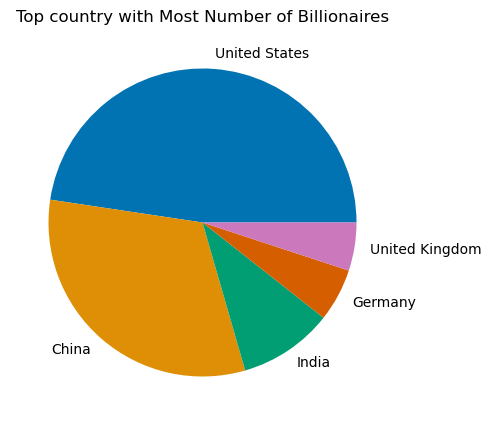

 
industry with the most number of billionaires
industry
Finance & Investments    361
Manufacturing            311
Technology               307
Fashion & Retail         255
Food & Beverage          200
Name: industry, dtype: int64
 


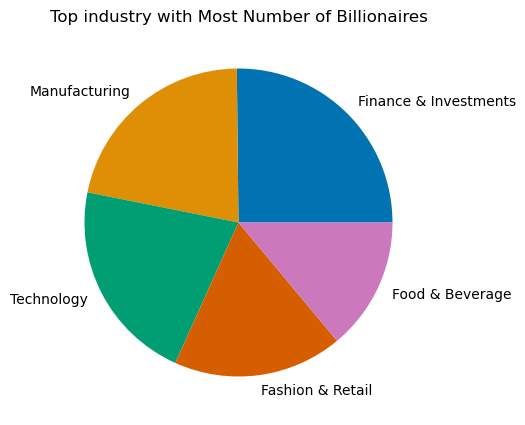

 
gender with the most number of billionaires
gender
male      2247
female     302
Name: gender, dtype: int64
 


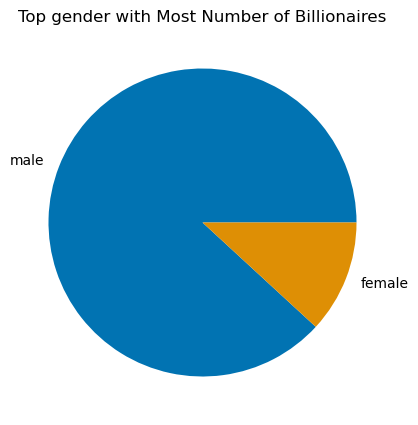

 

Let's see the menu!

1. Get to know our data a little

2. See the top categories with most number of billionaires!

3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!

4. Is the average net worth the same between gender (male and female)?

5. Let's do some ANOVA test, for any categorical columns with more than 3 unique values!

6. Let's build a regression model and see if it's any good :>

7. Quit


What can I get you today? 3



Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!
Correlation between age and networth: 0.067
See the joint plot below for the correlation between age and networth


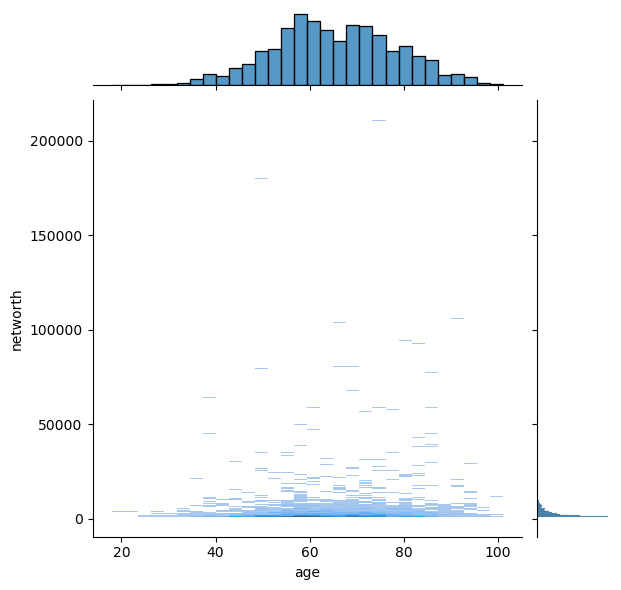


Let's see the menu!

1. Get to know our data a little

2. See the top categories with most number of billionaires!

3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!

4. Is the average net worth the same between gender (male and female)?

5. Let's do some ANOVA test, for any categorical columns with more than 3 unique values!

6. Let's build a regression model and see if it's any good :>

7. Quit


What can I get you today? 4


Is the average net worth the same between gender (male and female)? Let's do a t-test!
This is a t-test for Net Worth amongs Male and Female billionaires.
 H0: The Net Worth means are equal.
The results are: (-0.173726276025037, 0.8620943918206342)
The P value is 0.8620943918206342 while alpha is 0.05. We can't reject that the Net Worth means are equal between 2 genders


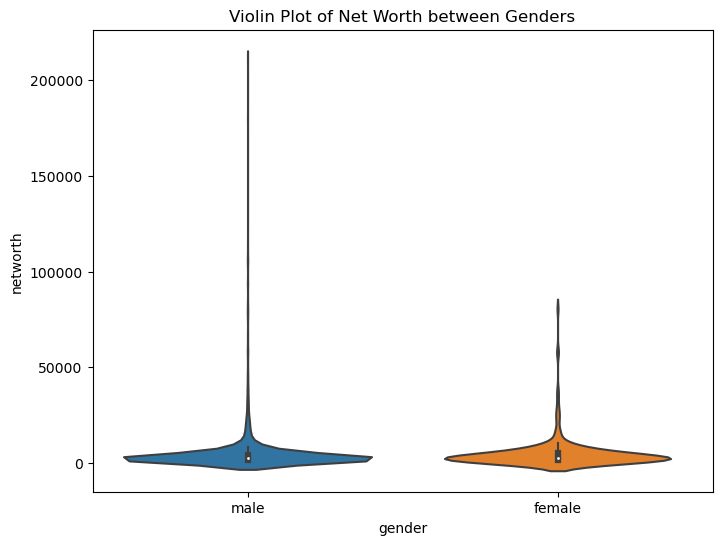


Let's see the menu!

1. Get to know our data a little

2. See the top categories with most number of billionaires!

3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!

4. Is the average net worth the same between gender (male and female)?

5. Let's do some ANOVA test, for any categorical columns with more than 3 unique values!

6. Let's build a regression model and see if it's any good :>

7. Quit


What can I get you today? 5



Let's see some ANOVA tests!
This is an ANOVA test to compare the Net Worth means between different country. H0: All means are equal
Statistic: 1.1483888852350341, P Value: 0.18018512409028037
P value > Alpha. We fail to reject H0: the networth means are equal among different country.



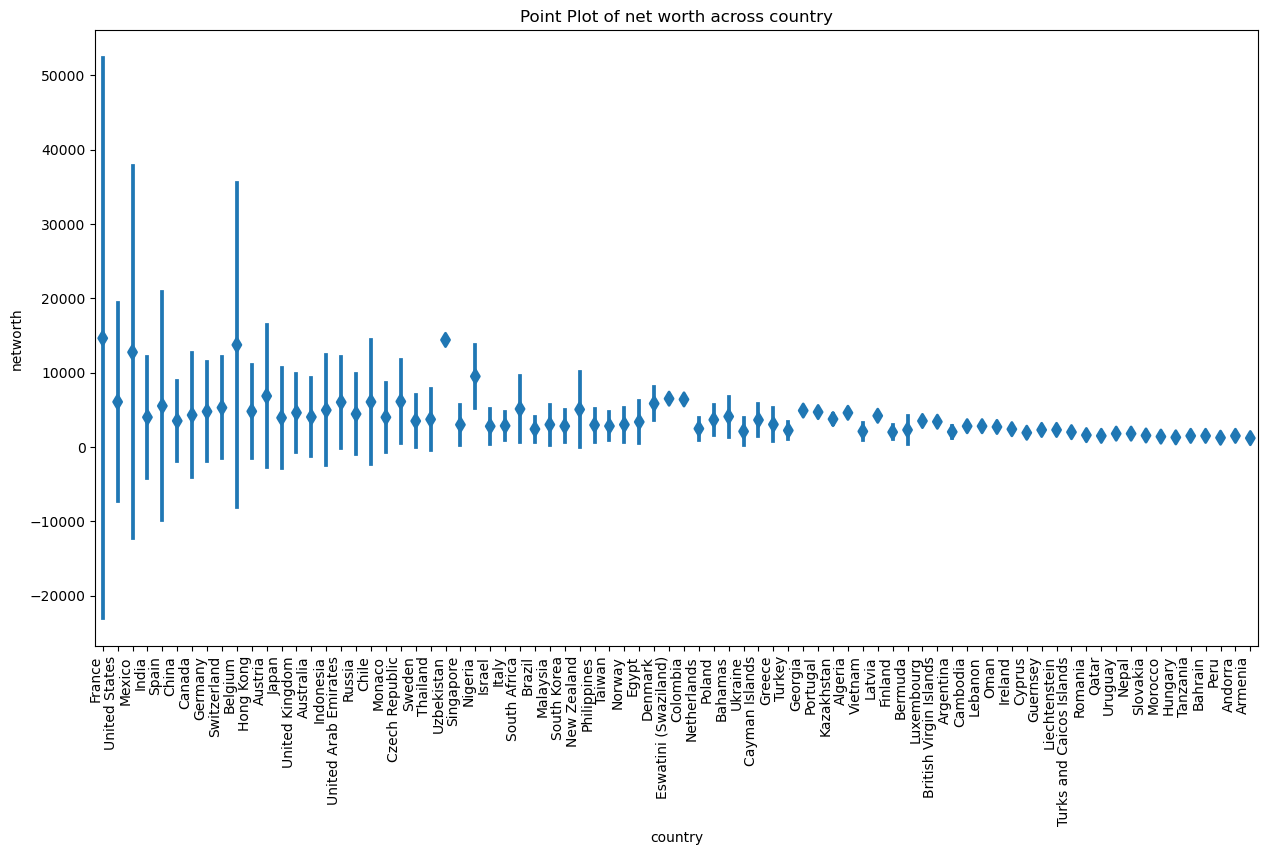

This is an ANOVA test to compare the Net Worth means between different industry. H0: All means are equal
Statistic: 2.418745836673972, P Value: 0.0009618136504307471
P value < Alpha. We reject H0: the networth means are equal among different industry.



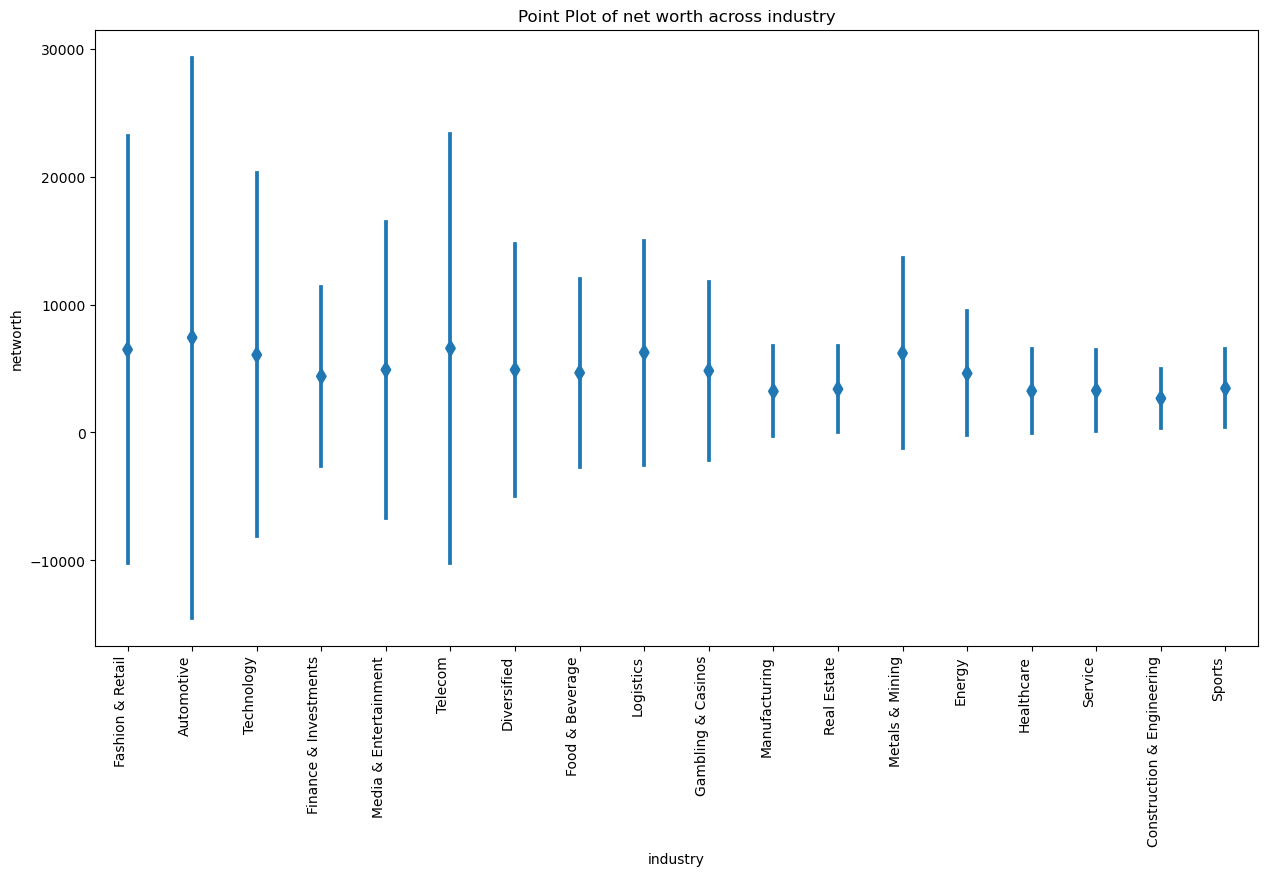


Let's see the menu!

1. Get to know our data a little

2. See the top categories with most number of billionaires!

3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!

4. Is the average net worth the same between gender (male and female)?

5. Let's do some ANOVA test, for any categorical columns with more than 3 unique values!

6. Let's build a regression model and see if it's any good :>

7. Quit


What can I get you today? 6


Let's build a regression model and see if it's any good!
Linear Regression Equation
 3854.321  +  56.01 * age  + -2747.04 * country_Andorra  + -3002.21 * country_Argentina  + -1600.52 * country_Armenia  + -1027.75 * country_Australia  +  2621.28 * country_Austria  + -1189.80 * country_Bahamas  + -1362.79 * country_Bahrain  +  10546.37 * country_Belgium  + -2482.47 * country_Bermuda  + -1824.32 * country_Brazil  + -2039.21 * country_British Virgin Islands  + -2093.00 * country_Cambodia  + -328.42 * country_Canada  + -1635.30 * country_Cayman Islands  +  19.17 * country_Chile  + -381.85 * country_China  +  1583.26 * country_Colombia  + -3452.52 * country_Cyprus  +  1725.95 * country_Czech Republic  +  2643.80 * country_Denmark  + -1317.38 * country_Egypt  + -1055.06 * country_Eswatini (Swaziland)  + -1473.13 * country_Finland  +  10208.77 * country_France  +  1371.40 * country_Georgia  +  252.25 * country_Germany  + -1804.99 * country_Greece  + -1396.62 * country_Guernsey  +  893.63 * co

What can I get you today? 7


In [8]:
# Build a menu choice
def myMenu(df):
    quit = False
    while quit == False:
        print("\nLet's see the menu!")
        print("\n1. Get to know our data a little")
        print("\n2. See the top categories with most number of billionaires!")
        print("\n3. Let's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!")
        print("\n4. Is the average net worth the same between gender (male and female)?")
        print("\n5. Let's do some ANOVA test, for any categorical columns with more than 3 unique values!")
        print("\n6. Let's build a regression model and see if it's any good :>")
        print("\n7. Quit")
        menu_choice = input("What can I get you today?")
        try:
            menu_choice = int(menu_choice)
        except:
            print("Oops! You enter a text or a symbol. Enter a whole number for 1 to 7 only")
            continue
        if menu_choice not in [1, 2, 3, 4, 5, 6, 7]:
            print("Oops! Enter a whole number for 1 to 7 only")
        else:
            
            if menu_choice == 1:
                print("\nLet's get to know our data a little!")
                print("See the first 5 rows of the dataset")
                print(df.head())
                print("\nLet's see some statistics!")
                print(df.describe())

            if menu_choice == 2:
                print("\nLet's see what categories have the most number of billionaires.")
                category = df.select_dtypes("object")
                for col in category:
                    print(f"{col} with the most number of billionaires")
                    col = category[col].value_counts().head()
                    print(col.name)
                    print(col)
                    print(" ")
                    plt.figure(figsize = (5,5))
                    colors = sns.color_palette('colorblind')
                    plt.pie(col.values, colors = colors, labels = col.index)
                    plt.title(f"Top {col.name} with Most Number of Billionaires", fontsize=12)
                    plt.show()
                    print(" ")

            if menu_choice == 3:
                print("\nLet's talk number! What's the correlation between the quantitative columns in this dataset? See a jointplot too!")
                quant_cols = df.select_dtypes('number')
                corr_matrix = quant_cols.corr()
                for i in range(len(quant_cols.columns)):
                    col1 = quant_cols.columns[i]
                    for j in range(i+1, len(quant_cols.columns)):
                        col2 = quant_cols.columns[j]
                        correlation = corr_matrix.loc[col1, col2]
                        print(f"Correlation between {col1} and {col2}: {correlation:.3f}")
                        print(f"See the joint plot below for the correlation between {col1} and {col2}")
                        sns.jointplot(data = quant_cols, x = col1, y = col2, kind = "hist")
                        plt.show()

            if menu_choice == 4:
                print("Is the average net worth the same between gender (male and female)? Let's do a t-test!")
                gender_df = df["gender"].unique()
                for i in range(len(gender_df)):
                    df_1 = df[df["gender"] == gender_df[i]]
                    for j in range(i+1, len(gender_df)):
                        df_2 = df[df["gender"] == gender_df[j]]
                        alpha = 0.05
                        stat, p_value = ttest_ind(df_1["networth"], df_2["networth"])
                print("This is a t-test for Net Worth amongs Male and Female billionaires.\n H0: The Net Worth means are equal.")
                print(f"The results are: {stat, p_value}")
                if p_value < alpha:
                    print(f"The P value is {p_value} while alpha is {alpha}. We reject that the Net Worth means are equal between 2 genders")
                else:
                    print(f"The P value is {p_value} while alpha is {alpha}. We can't reject that the Net Worth means are equal between 2 genders")
                plt.figure(figsize=(8, 6))
                sns.violinplot(x="gender", y="networth", data=df)
                plt.title('Violin Plot of Net Worth between Genders')
                plt.show()
            
            if menu_choice == 5:
                print("\nLet's see some ANOVA tests!")
                object_cols = df.select_dtypes("object")
                
                # Get the columns with more than 3 categorical unique values
                anova_cat = [col for col in object_cols.columns if object_cols[col].nunique() > 3]
                for column in anova_cat:
                    unique_vals = object_cols[column].unique()
                    group = [df[df[column] == value]["networth"] for value in unique_vals]
                    stat, p_value = f_oneway(*group)
                    print(f"This is an ANOVA test to compare the Net Worth means between different {column}. H0: All means are equal")
                    print(f"Statistic: {stat}, P Value: {p_value}")
                    alpha = 0.05 
                    if p_value < alpha:
                        print(f"P value < Alpha. We reject H0: the networth means are equal among different {column}.\n")
                    else:
                        print(f"P value > Alpha. We fail to reject H0: the networth means are equal among different {column}.\n")
                    # Build pointplots
                    plt.figure(figsize=(15, 8))
                    sns.pointplot(x=column, y="networth", data=df, errorbar='sd', markers = "d", join = False)
                    plt.title(f"Point Plot of net worth across {column}")
                    plt.xticks(rotation=90, ha="right")  # Rotate x-axis labels for better readability
                    plt.show()
                
            if menu_choice == 6:
                print("Let's build a regression model and see if it's any good!")
                # Encode all categorical variables
                encoded = pd.get_dummies(df, columns = df.select_dtypes("object").columns, drop_first = True)

                # Define independent and dependent variables
                X = encoded.drop("networth", axis = 1)
                X = sm.add_constant(X)
                y = encoded["networth"]

                # Fit the model
                model = sm.OLS(y, X).fit()

                # Get the equation
                coeff = model.params
                intercept = coeff["const"]
                equation = [f"{intercept: .3f}"]
                for variable, coefficient in coeff.items():
                    if variable != "const":
                        equation.append(f" + {coefficient: .2f} * {variable}")
                model_equation = " ".join(equation)
                print("Linear Regression Equation")
                print(f"{model_equation}\n")

                # Evaluate the model
                r2 = model.rsquared
                print(f"The R-squared is {r2}.{r2*100: .4f}% of the varinance in the dependent variable is explained by Net Worth in the model.\n")
                if r2 < 0.6:
                    print("This is not a very good model. Let's clean the data more thoroughly or drop some variables.")
                else:
                    print("This model can be used for further analysis")
                    
            if menu_choice == 7:
                quit = True

myMenu(billionaire)

In [9]:
# Convert the final dataframe to a csv for submission
billionaire.to_csv("billionaire_final.csv", index = False)

## Project Presentation

**Project Highlight:**
<br>
- Overall, I'm pretty satisfied with this project, maybe a 7 out of 10 in term of satisfaction.
- I started with finding the dataset. I know I wanted to do something different than my midterm one. Also, since this project doesn't emphasize on helping the business make any decisions, I figured I would do something of personal interests. Hence, I chose this Billionaire dataset.
- The highlight of my project is definitely my ability to use different visualization that I have never used in Python before, like Point Plot and Violin chart.
- I learned to use /(*group) and .nunique()/ for my codes.
- I learned to extract items from parameters for regression and assemble a linear regression equation!

**Positive Points**
<br>
- I figured out how to get the Regression done using statsmodels.api instead of realizing on the StatsModels module, which was a good thing!
- Seaborn is great! I had a lot of fun trying out different shapes and color palette.
- I have always shy from using ChatGPT before for my code, but this time I think the tool was a big help. Don't worry, I didn't ask ChatGPT to write the code for me. The way I did it was that if I failed 3 times in fixing my code, I would paste it in ChatGPT so it can help me point out the errors.
- I had a lot of fun with this project.

**Improvements for Future Projects**
<br>
- I tried to generate a filled map to find the distribution of billionaires amongst countries but I couldn't do it. I think once break comes and I have more time, I would definitely give it a try again.
- In my menu choice, sometimes I still have to call out specific columns, I would love to change that so the menu choice can be used universially amongs database!
- I saw a lot of elegant charts online, so I would love to try doing those for my next projects.